# numpy实现梯度下降法
以下为分别采用BGD、SGD、MBGD拟合y=3x_1+4x_2的系数[3, 4]的代码
https://blog.csdn.net/xiaoxy97/article/details/83014243

In [17]:

import time
import numpy as np
 


In [18]:
# 样本数为100条，特征数为二维
def get_data(sample_num=100):
    x1 = np.linspace(0, 9, sample_num)
    x2 = np.linspace(4, 13, sample_num)
    x = np.concatenate(([x1], [x2]), axis=0).T
    y = np.dot(x, np.array([3, 4]).T) 
    return x, y

In [11]:
x,y = get_data()
print(x.shape,y.shape)

(100, 2) (100,)


In [19]:

# BGD 批量梯度下降法(Batch Gradient Descent, BGD)，使用所有样本在当前点的梯度值来对变量参数进行更新操作
def bgd(x, y, step_size=0.01, max_iter_count=10000):
    w = np.ones((x.shape[1],)) #x.shape[1]为2，x的分量的个数
    x1 = x[:, 0]
    x2 = x[:, 1]
    loss = 10
    iter_count = 0
    while abs(loss) > 0.0001 and iter_count < max_iter_count:
        w[0] -= step_size * (np.sum((w[0] * x1 + w[1] * x2 - y) * x1) / x.shape[0]) #步长*梯度，梯度是所有梯度的均值
        w[1] -= step_size * (np.sum((w[0] * x1 + w[1] * x2 - y) * x2) / x.shape[0])
        loss = np.sum(w[0] * x1 + w[1] * x2 - y)/x.shape[0] #loss不/x.shape[0] 求均值？
        iter_count += 1
        print("iter_count:%d    the loss:%f" % (iter_count, loss))
    return w



In [20]:
# SGD 随机梯度下降法(Stochastic Gradient Descent, SGD),在更新变量参数的时候，随机选取一个样本的梯度值来更新参数。
def sgd(x, y, step_size=0.01, max_iter_count=10000):
    w = np.ones((x.shape[1],))
    x1 = x[:, 0]
    x2 = x[:, 1]
    loss = 10
    iter_count = 0
    while abs(loss) > 0.00001 and iter_count < max_iter_count:
        i = np.random.randint(x.shape[0]) #sample_num个样本里随机选一个
        w[0] -= step_size * (w[0] * x1[i] + w[1] * x2[i] - y[i]) * x1[i]
        w[1] -= step_size * (w[0] * x1[i] + w[1] * x2[i] - y[i]) * x2[i]
        loss = np.sum(w[0] * x1 + w[1] * x2 - y)
        iter_count += 1
        print("iter_count:%d    the loss:%f" % (iter_count, loss))
    return w


In [21]:
# MSGD 小批量梯度下降法(Mini-batch Gradient Descent, MBGD),集合BGD和SGD的特性，从原始数据中，每次选择n个样本来更新参数值。
   
def msgd(x, y, batch_size, step_size=0.01, max_iter_count=10000): #每次batch_size个样本更新参数
    w = np.ones((x.shape[1],))
    x1 = x[:, 0]
    x2 = x[:, 1]
    loss = 10
    iter_count = 0
    while abs(loss) > 0.00001 and iter_count < max_iter_count:
        i = np.random.randint(x.shape[0], size=batch_size) #从sample_num个样本里随机选batch_size个
        w[0] -= step_size * (np.sum((w[0] * x1[i] + w[1] * x2[i] - y[i]) * x1[i]) / batch_size)
        w[1] -= step_size * (np.sum((w[0] * x1[i] + w[1] * x2[i] - y[i]) * x2[i]) / batch_size) #x1[i]这样操作可以
        loss = np.sum(w[0] * x1 + w[1] * x2 - y)/ batch_size
        iter_count += 1
        print("iter_count:%d    the loss:%f" % (iter_count, loss))
    return w
'''
numpy.random.randint(low, high=None, size=None, dtype='l')
函数的作用是，返回一个随机整型数，范围从低（包括）到高（不包括），即[low, high)。
如果没有写参数high的值，则返回[0,low)的值。
'''

"\nnumpy.random.randint(low, high=None, size=None, dtype='l')\n函数的作用是，返回一个随机整型数，范围从低（包括）到高（不包括），即[low, high)。\n如果没有写参数high的值，则返回[0,low)的值。\n"

In [22]:
x, y = get_data()
time1 = time.time()
print(bgd(x, y))
time2 = time.time()
print(sgd(x, y))
time3 = time.time()
print(msgd(x, y, 10))
time4 = time.time()

iter_count:1    the loss:-5.388679
iter_count:2    the loss:-0.903801
iter_count:3    the loss:-0.212052
iter_count:4    the loss:-0.104556
iter_count:5    the loss:-0.087062
iter_count:6    the loss:-0.083443
iter_count:7    the loss:-0.081974
iter_count:8    the loss:-0.080847
iter_count:9    the loss:-0.079785
iter_count:10    the loss:-0.078745
iter_count:11    the loss:-0.077719
iter_count:12    the loss:-0.076707
iter_count:13    the loss:-0.075708
iter_count:14    the loss:-0.074722
iter_count:15    the loss:-0.073748
iter_count:16    the loss:-0.072788
iter_count:17    the loss:-0.071840
iter_count:18    the loss:-0.070904
iter_count:19    the loss:-0.069981
iter_count:20    the loss:-0.069069
iter_count:21    the loss:-0.068170
iter_count:22    the loss:-0.067282
iter_count:23    the loss:-0.066405
iter_count:24    the loss:-0.065541
iter_count:25    the loss:-0.064687
iter_count:26    the loss:-0.063844
iter_count:27    the loss:-0.063013
iter_count:28    the loss:-0.062192
i

In [23]:
print('bgd ',time2-time1)
print('sgd ',time3-time2)
print('msgd ',time4-time3)

bgd  0.0329129695892334
sgd  0.025929689407348633
msgd  0.07679390907287598


# pytorch实现梯度下降法
首先随机生成N个数，再通过一个线性函数生成目标数据target，然后将这N个数据通过我们自定义的神经网络得到输出output，通过不断迭代更新w和b，最小化target和output的差值，以此来实现：输入最初产生的随机数据N，通过网络，得到近似线性函数生成的目标数据target。
https://blog.csdn.net/m0_37673307/article/details/82315176

In [24]:
import torch
#from torch.autograd import Variable
#import torch.nn as nn
#import torch.nn.functional as f
#import torch.optim as optim
import matplotlib.pyplot as plt


In [34]:
#定义网络
NUM = 100   #输入 输出个数（输入层神经元个数） 线性回归
hider_num = 300  #隐藏层神经元个数
class Net(torch.nn.Module): #继承父类，
    def __init__(self):#构造函数
        super(Net,self).__init__() # 必须在构造函数中执行父类的构造函数

        self.fc1 = torch.nn.Linear(NUM,hider_num) #把网络中具有 可学习参数的层 放在 构造函数中
        self.fc2 = torch.nn.Linear(hider_num,NUM) #实现线性回归，输入和输出个数一致
    def forward(self,x): #实现 nn.Module的forward方法，前向传播的计算过程
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
#生成数据 x-target
X = torch.randn(NUM)#标准正态分布，维度为一维NUM长度向量？，Tensor类型数据,,requires_grad=True
#要想使得Tensor使用autograd功能，只需要设置tensor.requries_grad=True
print(input.size())
target = torch.Tensor(0.5 *X+ 0.3) #用0.5 × x + 0.3 函生成目标数据
print(target.size())

torch.Size([100])
torch.Size([100])


## SGD

In [39]:
#网络更新
net = Net()   #初始化网络
print(net)
 
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)  #随机梯度下降优化器
loss_list =[]                                #保存loss，便于画图
epochs = 500                                    #迭代次数
 
for epoch in range(epochs):
    optimizer.zero_grad()                    #参数梯度清零，因为会累加
    out = net(X)                         #通过一次forward 网络的输出
    loss = torch.nn.MSELoss()(out,target)           #计算输出与target数据的均方差
    loss_list.append(loss)                    #保存loss
    loss.backward()                           #loss反向传播
    optimizer.step()                          #更新参数w，b,所有样本过一次，计算总loss值，参数更新一次

Net(
  (fc1): Linear(in_features=100, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
)


In [40]:

print('loss 的层级--------->')
last_fn = loss.grad_fn    #y.grad_fn # pytorch 会自动调用autograd的所有记录操作
while last_fn:
    print(last_fn)
    last_fn = last_fn.next_functions[0][0]  #不断找上一层function
'''
Variable主要包含三个属性。 - data：保存Variable所包含的Tensor 
                        - grad：保存data对应的梯度，grad也是个Variable，而不是Tensor，它和data的形状一样。 
                        - grad_fn：指向一个Function对象，这个Function用来反向传播计算输入的梯度，具体细节会在下一章讲解。
从0.4起, Variable 正式合并入Tensor, Variable 本来实现的自动微分功能，Tensor就能支持。
'''


loss 的层级--------->


'\nVariable主要包含三个属性。 - data：保存Variable所包含的Tensor \n                        - grad：保存data对应的梯度，grad也是个Variable，而不是Tensor，它和data的形状一样。 \n                        - grad_fn：指向一个Function对象，这个Function用来反向传播计算输入的梯度，具体细节会在下一章讲解。\n从0.4起, Variable 正式合并入Tensor, Variable 本来实现的自动微分功能，Tensor就能支持。\n'

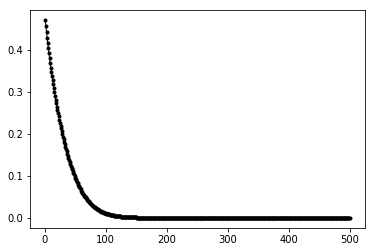

In [42]:
 #画loss图
plt.figure(1)
plt.plot(range(1,epochs+1),loss_list,'o-',ms=3,lw=1,color='black')
plt.show()  

## MSGD

In [46]:
import torch.utils.data as d

In [47]:
Xloader = d.DataLoader(X, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)
testloader = d.DataLoader(target,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

In [48]:

'''
torch.set_num_threads(8)???
不设置，cpu51%，时间15ms;2的时候，cpu17%,时间15ms变为25ms;4的时候，cpu34%，时间17ms;8的时候，cpu67%，
'''
criterion = torch.nn.MSELoss() # 
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # momentum=0.9？？？？
optimizer = torch.optim.SGD(net.parameters(),lr=0.001)  #随机梯度下降优化器，momentum 动量 可选参数

torch.set_num_threads(4) #num_threads 为8，线程数？
for epoch in range(epochs):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #??? i从0开始的意思？
        # 输入数据
        inputs, labels = data #一次迭代 batch_size为4
        # 梯度清零
        optimizer.zero_grad()    
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()       
        # 每一个batch_size 更新一次参数 
        optimizer.step()       
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 25 == 24: # 每25batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 25)) #每2000个样本，计算平均loss值，打印
            running_loss = 0.0
print('Finished Training')

ValueError: too many values to unpack (expected 2)

# pytorch实现一个简单的神经网络

## 数据加载

In [56]:
import torchvision as tv
import torchvision.transforms as transforms

In [58]:
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化，具体含义是？？
                             ])

In [62]:
# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)  
testset = tv.datasets.CIFAR10(
                    '/home/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [63]:
trainloader = d.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)
testloader = d.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [64]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

In [65]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [66]:
#定义损失函数和优化器(loss和optimizer)
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

In [69]:
#训练
torch.set_num_threads(4) #num_threads 为8，线程数？
for epoch in range(5):  #共训练2个epoch
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #??? i从0开始的意思？
        
        # 输入数据
        inputs, labels = data #一次迭代 batch_size为4
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000)) #每2000个样本，计算平均loss值，打印
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.403
[1,  4000] loss: 1.400
[1,  6000] loss: 1.372
[1,  8000] loss: 1.335
[1, 10000] loss: 1.303
[1, 12000] loss: 1.316
[2,  2000] loss: 1.243
[2,  4000] loss: 1.228
[2,  6000] loss: 1.242
[2,  8000] loss: 1.226
[2, 10000] loss: 1.210
[2, 12000] loss: 1.201
[3,  2000] loss: 1.113
[3,  4000] loss: 1.149
[3,  6000] loss: 1.137
[3,  8000] loss: 1.119
[3, 10000] loss: 1.137
[3, 12000] loss: 1.128
[4,  2000] loss: 1.049
[4,  4000] loss: 1.067
[4,  6000] loss: 1.087
[4,  8000] loss: 1.067
[4, 10000] loss: 1.058
[4, 12000] loss: 1.062
[5,  2000] loss: 0.993
[5,  4000] loss: 1.010
[5,  6000] loss: 1.020
[5,  8000] loss: 1.000
[5, 10000] loss: 1.008
[5, 12000] loss: 1.034
Finished Training


In [71]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数

# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1) #??
        total += labels.size(0) #??
        correct += (predicted == labels).sum() #??

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 61 %
